# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

* Data
* Variable	Definition
* User_ID	User ID
* Product_ID	Product ID
* Gender	Sex of User
* Age	Age in bins
* Occupation	Occupation (Masked)
* City_Category	Category of the City (A,B,C)
* Stay_In_Current_City_Years	Number of years stay in current city
* Marital_Status	Marital Status
* Product_Category_1	Product Category (Masked)
* Product_Category_2	Product may belongs to other category also (Masked)
* Product_Category_3	Product may belongs to other category also (Masked)
* Purchase	Purchase Amount (Target Variable)

# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as pandas
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Train dataset

In [2]:
df1 = pd.read_csv("blackFriday_train.csv")
print(df1.shape)
df1.head()

(550068, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df2 = pd.read_csv("blackFriday_test.csv")
print(df1.shape)
df2.head()

(550068, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


# Merging the Datasets

In [6]:
data = df1.merge(df2, how = "outer" )
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
783663,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
783664,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
783665,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [ ]:
data.describe()

In [8]:
data["Product_Category_2"]

0          NaN
1          6.0
2          NaN
3         14.0
4          NaN
          ... 
783662     NaN
783663     8.0
783664     5.0
783665    16.0
783666     5.0
Name: Product_Category_2, Length: 783667, dtype: float64

In [9]:
data["Product_Category_3"]

0          NaN
1         14.0
2          NaN
3          NaN
4          NaN
          ... 
783662     NaN
783663     NaN
783664    12.0
783665     NaN
783666     NaN
Name: Product_Category_3, Length: 783667, dtype: float64

# Calulating the Availabe values percentage for Nan value columns

In [10]:
# Product Category 2
537685/783667*100

68.611412755673

In [11]:
# Product Category 3
237858/783667*100

30.35192243644303

In [12]:
# Purchase
550068/783667*100

70.1915481958536

In [13]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [14]:
data["Product_Category_2"].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [15]:
data["Product_Category_2"].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [16]:
data["Product_ID"].value_counts()

P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
             ... 
P00309842       1
P00092742       1
P00059342       1
P00062542       1
P00270342       1
Name: Product_ID, Length: 3677, dtype: int64

# Converting cateogrical data into integar ones by using mapping function

In [17]:
data["Gender"]=data["Gender"].map({"F": 0, "M":1})
data["Gender"].head(10) #Checking the column after transformation

0    0
1    0
2    0
3    0
4    1
5    1
6    1
7    1
8    1
9    1
Name: Gender, dtype: int64

# Mapping Age Value  in integar ones

In [18]:
data["Age"] = data["Age"].map({'0-17':0,'18-25':1 ,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})


In [19]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [20]:
data.shape

(783667, 12)

# creating dummies for the categorical data

alogo type :- one hot encoding

In [21]:
city = pd.get_dummies(data["City_Category"],drop_first=True)
city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
783662,1,0
783663,1,0
783664,1,0
783665,0,1


In [22]:
data = pd.concat((data,city),axis = 1)
data.head() # checking the datast after transformation

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,1000001,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,1000002,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [23]:
data.drop("City_Category",axis=1,inplace = True)

In [24]:
data.rename(columns={"B":"City B","C":"City C"},inplace =True)

# Visualizing last 5 Rows

In [25]:
data.tail()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City B,City C
783662,1006036,P00118942,0,3,15,4+,1,8,NaN,NaN,NaN,1,0
783663,1006036,P00254642,0,3,15,4+,1,5,8.0,NaN,NaN,1,0
783664,1006036,P00031842,0,3,15,4+,1,1,5.0,12.0,NaN,1,0
783665,1006037,P00124742,0,5,1,4+,0,10,16.0,NaN,NaN,0,1
783666,1006039,P00316642,0,5,0,4+,1,4,5.0,NaN,NaN,1,0


# Checking for columnwise null values

In [26]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
City B                             0
City C                             0
dtype: int64

# Visualing the unique values of fields which contain Nan values for diffrent columns

In [27]:
data["Product_Category_1"].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [28]:
data["Product_Category_2"].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [29]:
data["Product_Category_3"].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [30]:
data["Purchase"].unique()

array([ 8370., 15200.,  1422., ...,   123.,   613.,    nan])

# Value count of each variable

In [31]:
data.Product_Category_1.value_counts()

5     215950
1     200699
8     162294
11     34440
2      34056
6      29326
3      28791
4      16756
16     13933
15      8984
13      7930
10      7373
12      5610
7       5345
18      4436
20      2550
14      2186
19      1603
17       801
9        604
Name: Product_Category_1, dtype: int64

In [32]:
data.Product_Category_2.value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [33]:
data.Product_Category_3.value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

# Filling the Nan Value

In [34]:
data["Product_Category_2"] = data["Product_Category_2"].fillna(0)

In [35]:
data["Product_Category_3"] = data["Product_Category_3"].fillna(0)

In [36]:
data

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City B,City C
0,1000001,P00069042,0,0,10,2,0,3,0.0,0.0,8370.0,0,0
1,1000001,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,0,0,10,2,0,12,0.0,0.0,1422.0,0,0
3,1000001,P00085442,0,0,10,2,0,12,14.0,0.0,1057.0,0,0
4,1000002,P00285442,1,7,16,4+,0,8,0.0,0.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,0,3,15,4+,1,8,0.0,0.0,NaN,1,0
783663,1006036,P00254642,0,3,15,4+,1,5,8.0,0.0,NaN,1,0
783664,1006036,P00031842,0,3,15,4+,1,1,5.0,12.0,NaN,1,0
783665,1006037,P00124742,0,5,1,4+,0,10,16.0,0.0,NaN,0,1


In [37]:
#data.drop(["Product_Category_3","Product_Category_2"],axis=1,inplace = True)

In [38]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'City B',
       'City C'],
      dtype='object')

In [39]:
data

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City B,City C
0,1000001,P00069042,0,0,10,2,0,3,0.0,0.0,8370.0,0,0
1,1000001,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,0,0,10,2,0,12,0.0,0.0,1422.0,0,0
3,1000001,P00085442,0,0,10,2,0,12,14.0,0.0,1057.0,0,0
4,1000002,P00285442,1,7,16,4+,0,8,0.0,0.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,0,3,15,4+,1,8,0.0,0.0,NaN,1,0
783663,1006036,P00254642,0,3,15,4+,1,5,8.0,0.0,NaN,1,0
783664,1006036,P00031842,0,3,15,4+,1,1,5.0,12.0,NaN,1,0
783665,1006037,P00124742,0,5,1,4+,0,10,16.0,0.0,NaN,0,1


In [40]:
data.isnull().sum() # Checking the dataframe again null vslues Product_Category_2,Product_Category_3 no more have null values

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
City B                             0
City C                             0
dtype: int64

# Filling the nan values with the mean of the column.

In [41]:
data["Purchase"] = data["Purchase"].fillna(data["Purchase"].mean())

In [42]:
data.head() # Looking the dataframe after filling the null values 

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City B,City C
0,1000001,P00069042,0,0,10,2,0,3,0.0,0.0,8370.0,0,0
1,1000001,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,0,0,10,2,0,12,0.0,0.0,1422.0,0,0
3,1000001,P00085442,0,0,10,2,0,12,14.0,0.0,1057.0,0,0
4,1000002,P00285442,1,7,16,4+,0,8,0.0,0.0,7969.0,0,1


# Rechecking the null values

In [43]:
data.isnull().sum() # all the null values are removed

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
City B                        0
City C                        0
dtype: int64

# Renaming some columns name

In [44]:
data = data.rename(columns = {'Stay_In_Current_City_Years':"Stay_city_years",'Product_Category_1':"cat1",'Product_Category_2':"cat2",
                      'Product_Category_3':"cat3"})

In [45]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_city_years,Marital_Status,cat1,cat2,cat3,Purchase,City B,City C
0,1000001,P00069042,0,0,10,2,0,3,0.0,0.0,8370.0,0,0
1,1000001,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,0,0,10,2,0,12,0.0,0.0,1422.0,0,0
3,1000001,P00085442,0,0,10,2,0,12,14.0,0.0,1057.0,0,0
4,1000002,P00285442,1,7,16,4+,0,8,0.0,0.0,7969.0,0,1


# Replacing the value using str method

In [46]:
data.Stay_city_years = data.Stay_city_years.str.replace("+"," ") # replaceing + with blank 

<ipython-input-46-f7b72386a0b3>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data.Stay_city_years = data.Stay_city_years.str.replace("+"," ") # replaceing + with blank


In [47]:
data

,User_ID,Product_ID,Gender,Age,Occupation,Stay_city_years,Marital_Status,cat1,cat2,cat3,Purchase,City B,City C
0,1000001,P00069042,0,0,10,2,0,3,0.0,0.0,8370.000000,0,0
1,1000001,P00248942,0,0,10,2,0,1,6.0,14.0,15200.000000,0,0
2,1000001,P00087842,0,0,10,2,0,12,0.0,0.0,1422.000000,0,0
3,1000001,P00085442,0,0,10,2,0,12,14.0,0.0,1057.000000,0,0
4,1000002,P00285442,1,7,16,4,0,8,0.0,0.0,7969.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,0,3,15,4,1,8,0.0,0.0,9263.968713,1,0
783663,1006036,P00254642,0,3,15,4,1,5,8.0,0.0,9263.968713,1,0
783664,1006036,P00031842,0,3,15,4,1,1,5.0,12.0,9263.968713,1,0
783665,1006037,P00124742,0,5,1,4,0,10,16.0,0.0,9263.968713,0,1


# Converting the datatypes into intger ones as the datatype for these columns are shown as unsigned int in the info above

In [48]:
data["Stay_city_years"] = data["Stay_city_years"].astype(int)
data["City B"].astype(int)
data["City C"].astype(int)

0         0
1         0
2         0
3         0
4         1
         ..
783662    0
783663    0
783664    0
783665    1
783666    0
Name: City C, Length: 783667, dtype: int32

# Rechecking the data types of dataset

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 783666
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   User_ID          783667 non-null  int64  
 1   Product_ID       783667 non-null  object 
 2   Gender           783667 non-null  int64  
 3   Age              783667 non-null  int64  
 4   Occupation       783667 non-null  int64  
 5   Stay_city_years  783667 non-null  int32  
 6   Marital_Status   783667 non-null  int64  
 7   cat1             783667 non-null  int64  
 8   cat2             783667 non-null  float64
 9   cat3             783667 non-null  float64
 10  Purchase         783667 non-null  float64
 11  City B           783667 non-null  uint8  
 12  City C           783667 non-null  uint8  
dtypes: float64(3), int32(1), int64(6), object(1), uint8(2)
memory usage: 70.3+ MB


# Visualizing Age Vs Purchased

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

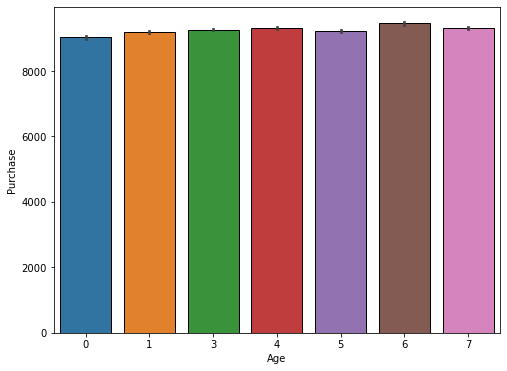

In [51]:
plt.figure(figsize= (8,6))
sns.barplot(x= "Age",y = "Purchase", data = data, edgecolor = "black")
plt.show()

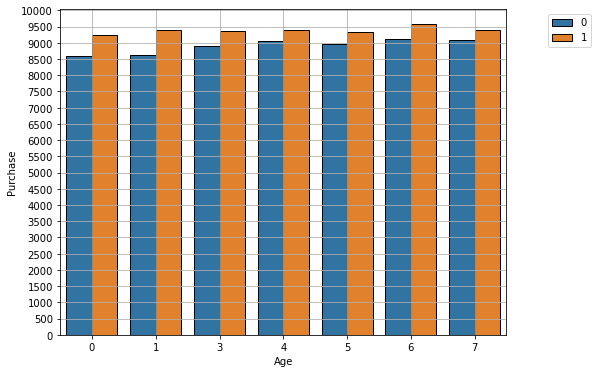

In [52]:
plt.figure(figsize= (8,6))
y = range(0,10001,500)
sns.barplot(x="Age",y = "Purchase", hue = "Gender", data =data, ci = False, edgecolor = "black")
plt.yticks(y)
plt.grid()
plt.legend(bbox_to_anchor=(1.20,1),loc = "upper right")
plt.show()

In [53]:
data.Purchase.max()

23961.0

Purchasing of goods of each range of age are almost equal. we can conclude that the percenatge of purchasing goods of men over
women is higher.

# Visualizing Occupation Vs Purchased

<function matplotlib.pyplot.show(close=None, block=None)>

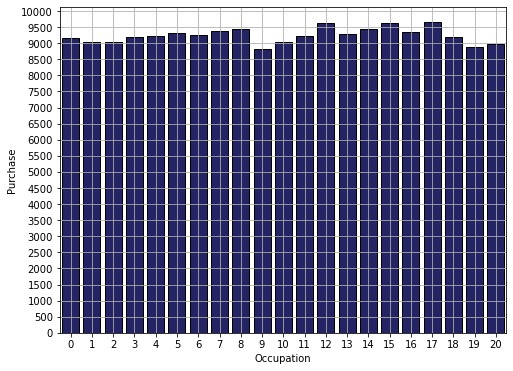

In [54]:
y = range(0,10001,500)
plt.figure(figsize= (8,6))
plt.yticks(y)
sns.barplot(x = "Occupation", y = "Purchase",data =data,color = "midnightblue" ,ci = False, edgecolor = "black")
plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

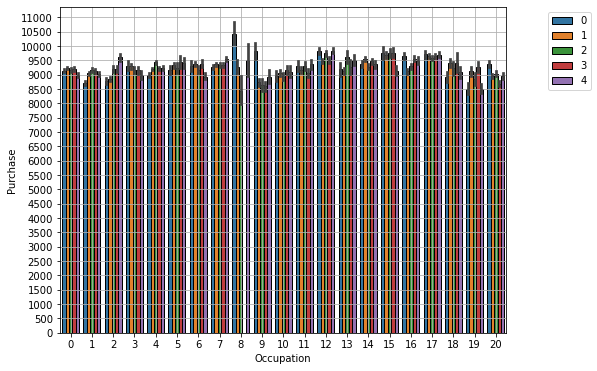

In [55]:
y = range(0,140001,500)
plt.figure(figsize= (8,6))
plt.yticks(y)
sns.barplot(x = "Occupation", y = "Purchase", hue = "Stay_city_years",
            data = data, edgecolor = "black")
plt.grid()
plt.legend(bbox_to_anchor=(1.20,1),loc = "upper right")
plt.show

All the occupation contributes almost same in purchasing rates and it won't affect alot that how many years you live in a city.

In [56]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_city_years', 'Marital_Status', 'cat1', 'cat2', 'cat3', 'Purchase',
       'City B', 'City C'],
      dtype='object')

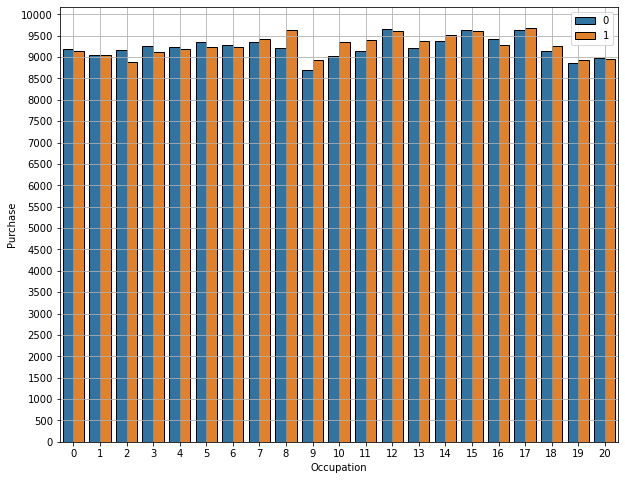

In [57]:
plt.figure(figsize = (10,8))
y = range(0,10001,500)
sns.barplot(x = 'Occupation', y = "Purchase", hue = 'Marital_Status',data = data, ci  = False, edgecolor = "black")
plt.yticks(y)
plt.grid()
plt.legend(bbox_to_anchor=(1,1),loc = "upper right")
plt.show()

# Visualizing Product_category1 Vs Purchased.

No handles with labels found to put in legend.


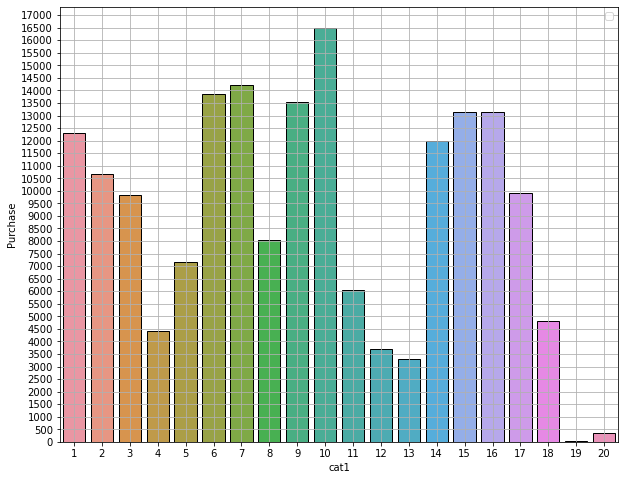

In [58]:
plt.figure(figsize = (10,8))
y = range(0,17001,500)
sns.barplot(x = "cat1", y = "Purchase", data = data,ci =False, edgecolor = "black")
plt.yticks(y)
plt.grid()
plt.legend(bbox_to_anchor=(1,1),loc = "upper right")
plt.show()

In [59]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_city_years', 'Marital_Status', 'cat1', 'cat2', 'cat3', 'Purchase',
       'City B', 'City C'],
      dtype='object')

No handles with labels found to put in legend.


<Figure size 720x576 with 0 Axes>

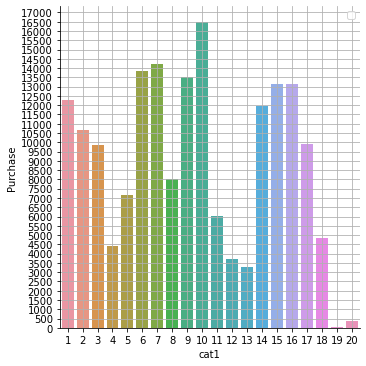

In [60]:
plt.figure(figsize = (10,8))
y = range(0,17001,500)
sns.catplot(x = "cat1", y = "Purchase", data = data,ci =False, kind = "bar")
plt.yticks(y)
plt.grid()
plt.legend(bbox_to_anchor=(1,1),loc = "upper right")
plt.show()

As per the Visualizition we conclude that Highest purchasing in value 10

<Figure size 720x576 with 0 Axes>

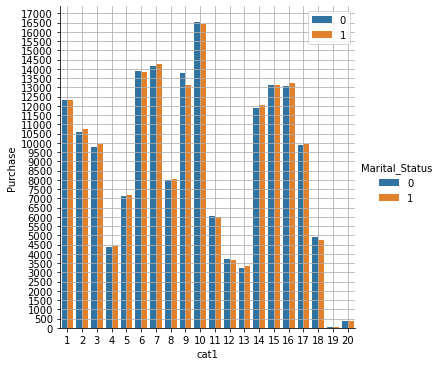

In [61]:
plt.figure(figsize = (10,8))
y = range(0,17001,500)
sns.catplot(x= "cat1", y = "Purchase",hue = "Marital_Status", data =data, kind = "bar", ci = False)
plt.yticks(y)
plt.grid()
plt.legend(bbox_to_anchor=(1,1),loc = "upper right")
plt.show()

In Product Category 1 contributes almost same in purchasing rates highest bill generating value in 10 and it won't affect alot that Marital Status also

<Figure size 720x576 with 0 Axes>

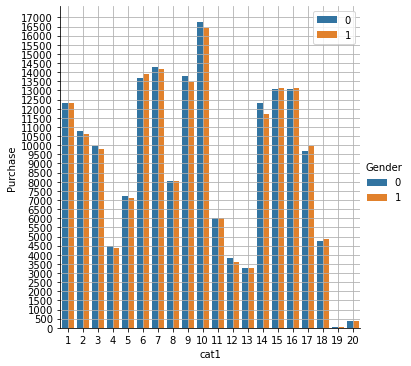

In [62]:
plt.figure(figsize = (10,8))
y = range(0,17001,500)
sns.catplot(x= "cat1", y = "Purchase",hue ='Gender' , data =data, kind = "bar",ci = False)
plt.yticks(y)
plt.grid()
plt.legend(bbox_to_anchor=(1,1),loc = "upper right")
plt.show()

we can conclude that the percenatge of purchasing goods in Product category 1 of women over men is higher.

No handles with labels found to put in legend.


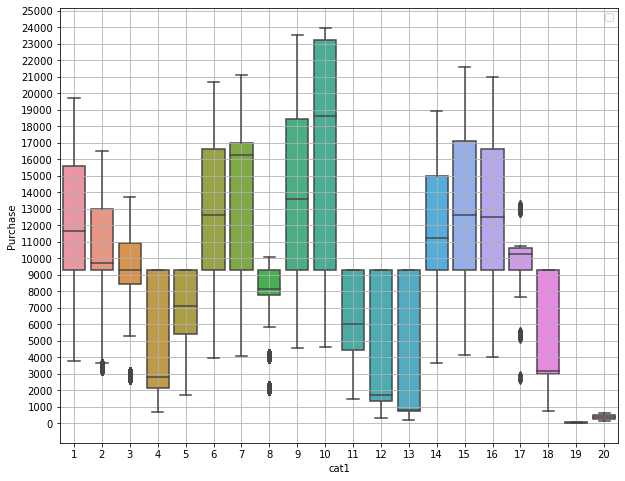

In [63]:
plt.figure(figsize = (10,8))
y = range(0,25001,1000)
sns.boxplot(x= "cat1", y = "Purchase", data =data)
plt.yticks(y)
plt.grid()
plt.legend(bbox_to_anchor=(1,1),loc = "upper right")
plt.show()

By using of box plot we can conclude that highest Purchase are genrating in value 9 and value 10 and minimum purchasing are between 4500 to 4800 and the maximum is 24000 in value 10.

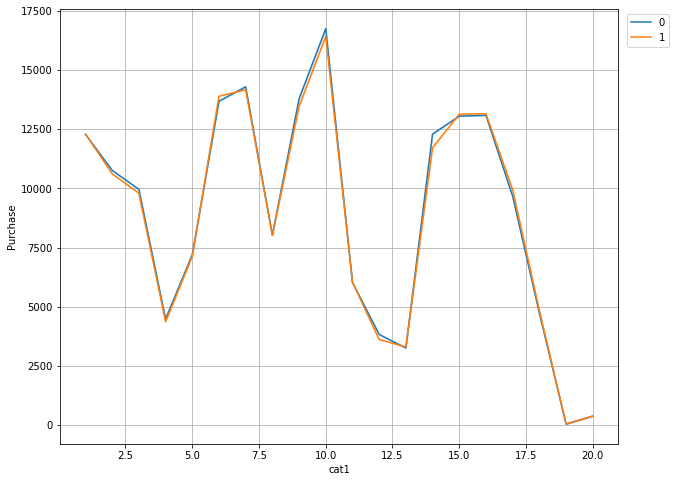

In [64]:
plt.figure(figsize = (10,8))
sns.lineplot(x= "cat1", y = "Purchase",hue="Gender" ,data =data, ci  = False)
plt.grid()
plt.legend(bbox_to_anchor=(1.10,1),loc = "upper right")
plt.show()

As we can see in the lineplot there is no difference in the marking due to gender.

<Figure size 720x576 with 0 Axes>

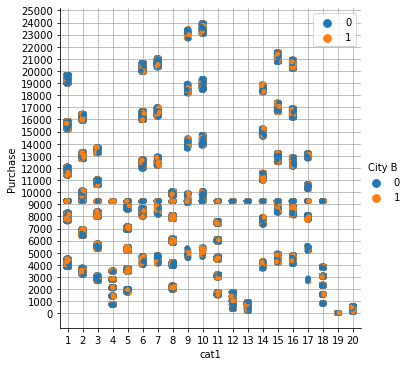

In [65]:
plt.figure(figsize = (10,8))
y = range(0,25001,1000)
sns.catplot(x= "cat1", y = "Purchase",hue ='City B', data =data,ci = False)
plt.yticks(y)
plt.grid()
plt.legend(bbox_to_anchor=(1,1),loc = "upper right")
plt.show()

<Figure size 720x576 with 0 Axes>

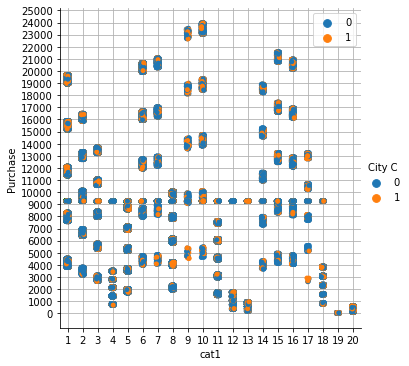

In [66]:
plt.figure(figsize = (10,8))
y = range(0,25001,1000)
sns.catplot(x= "cat1", y = "Purchase",hue ='City C', data =data,ci = False)
plt.yticks(y)
plt.grid()
plt.legend(bbox_to_anchor=(1,1),loc = "upper right")
plt.show()

# Visualizing Product_category2 Vs Purchased.

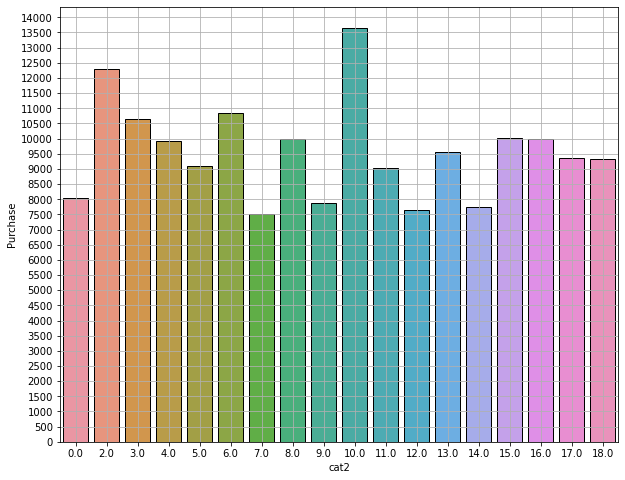

In [67]:
plt.figure(figsize = (10,8))
y = range(0,14001,500)
sns.barplot(x = "cat2", y = "Purchase", data = data,ci =False, edgecolor = "black")
plt.yticks(y)
plt.grid()
plt.show()


As per the Visualizition we conclude that Highest purchasing in value 10

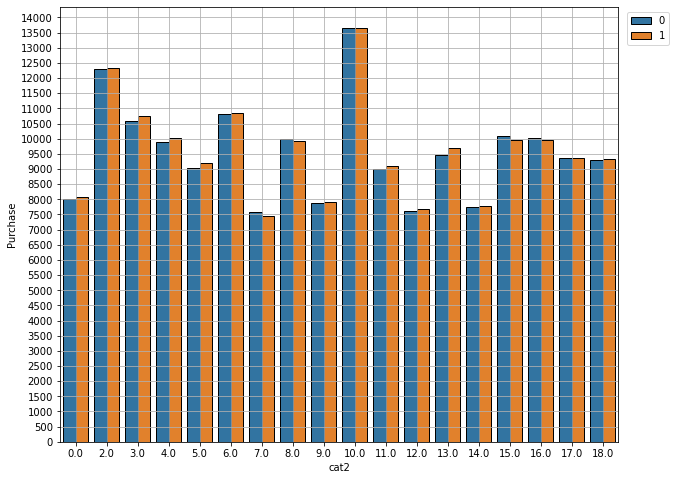

In [68]:
plt.figure(figsize = (10,8))
y = range(0,14001,500)
sns.barplot(x= "cat2", y = "Purchase",hue = "Marital_Status", data =data,ci = False, edgecolor= "black")
plt.yticks(y)
plt.grid()
plt.legend(bbox_to_anchor=(1.10,1),loc = "upper right")
plt.show()

In Product Category 2 contributes almost same in purchasing rates highest bill generating value in 10 and it won't affect alot that Marital Status also

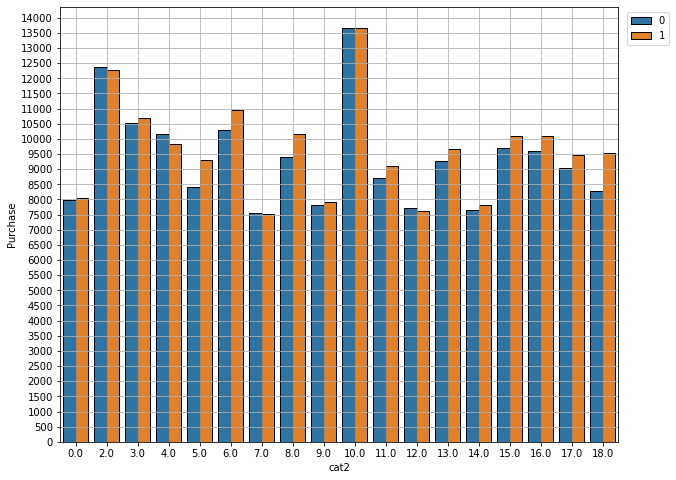

In [69]:
plt.figure(figsize = (10,8))
y = range(0,14001,500)
sns.barplot(x= "cat2", y = "Purchase",hue = "Gender", data =data,ci = False, edgecolor= "black")
plt.yticks(y)
plt.grid()
plt.legend(bbox_to_anchor=(1.10,1),loc = "upper right")
plt.show()

we can conclude that the percenatge of purchasing goods in Product category 1 of women over men is higher.

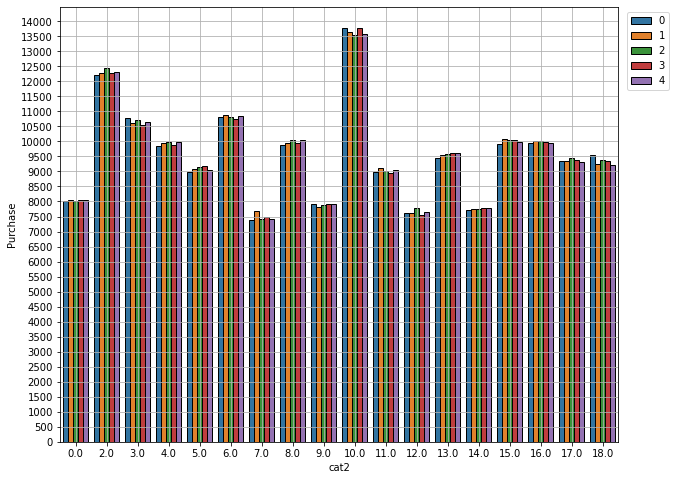

In [70]:
plt.figure(figsize = (10,8))
y = range(0,14001,500)
sns.barplot(x= "cat2", y = "Purchase",hue = "Stay_city_years", data =data,ci = False, edgecolor= "black")
plt.yticks(y)
plt.grid()
plt.legend(bbox_to_anchor=(1.10,1),loc = "upper right")
plt.show()

No handles with labels found to put in legend.


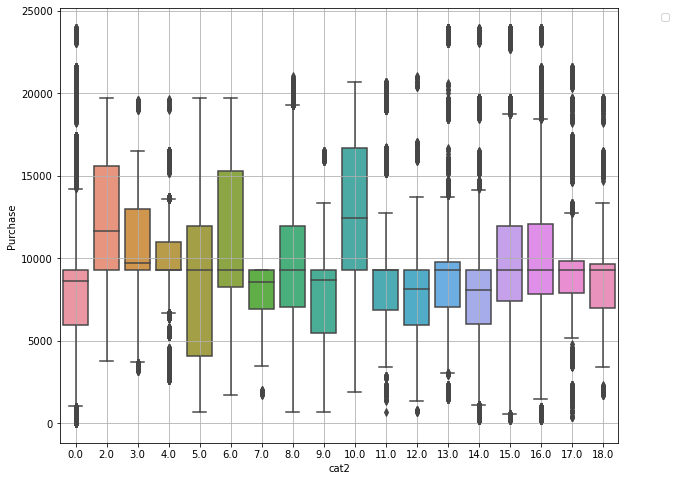

In [71]:
plt.figure(figsize = (10,8))
sns.boxplot(x= "cat2", y = "Purchase", data =data)
plt.grid()
plt.legend(bbox_to_anchor=(1.10,1),loc = "upper right")
plt.show()

As we can see with the help of boxplot, category 2 has more outlayers as compared to category 1

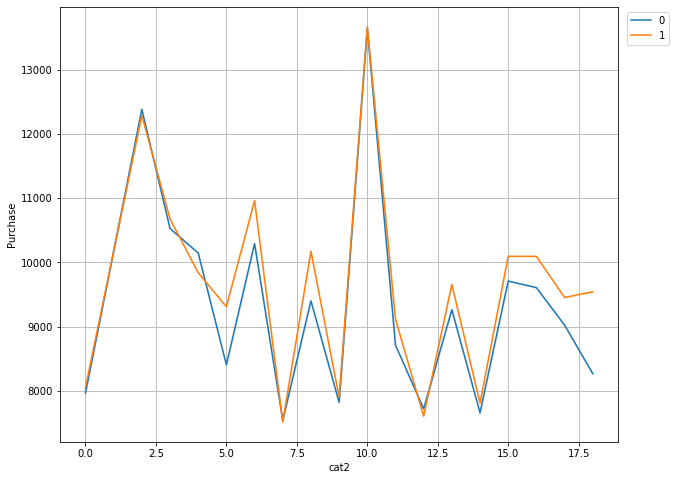

In [72]:
plt.figure(figsize = (10,8))
sns.lineplot(x= "cat2", y = "Purchase",hue="Gender" ,data =data, ci  = False)
plt.grid()
plt.legend(bbox_to_anchor=(1.10,1),loc = "upper right")
plt.show()

As we can see in the lineplot there is no difference in the marking due to gender.

<Figure size 720x576 with 0 Axes>

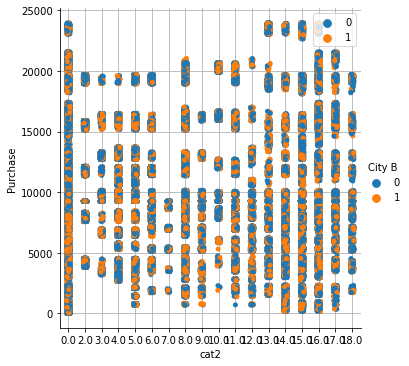

In [73]:
plt.figure(figsize = (10,8))
#y = range(0,25001,1000)
sns.catplot(x= "cat2", y = "Purchase",hue ='City B', data =data,ci = False)
#plt.yticks(y)
plt.grid()
plt.legend(bbox_to_anchor=(1,1),loc = "upper right")
plt.show()

<Figure size 720x576 with 0 Axes>

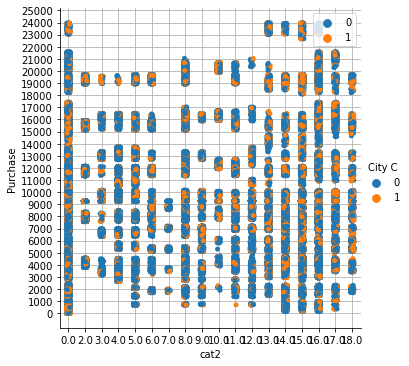

In [74]:
plt.figure(figsize = (10,8))
y = range(0,25001,1000)
sns.catplot(x= "cat2", y = "Purchase",hue ='City C', data =data,ci = False)
plt.yticks(y)
plt.grid()
plt.legend(bbox_to_anchor=(1,1),loc = "upper right")
plt.show()

# Visualizing Product_category 3 Vs Purchased.

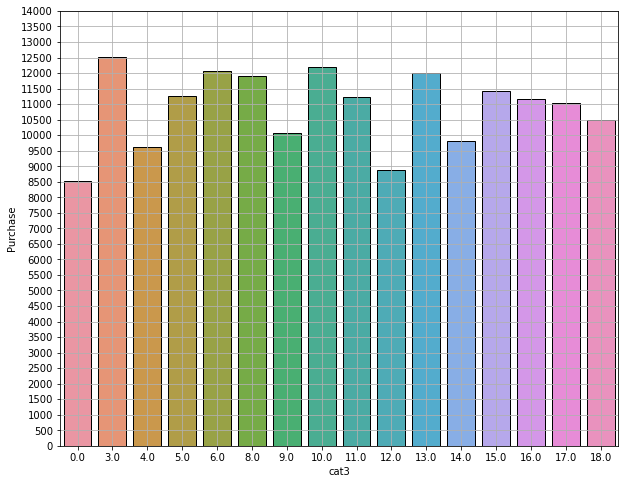

In [75]:
plt.figure(figsize = (10,8))
y = range(0,14001,500)
sns.barplot(x = "cat3", y = "Purchase", data = data,ci =False, edgecolor = "black")
plt.yticks(y)
plt.grid()
plt.show()


There is not much difference in marking in category 3 across all values

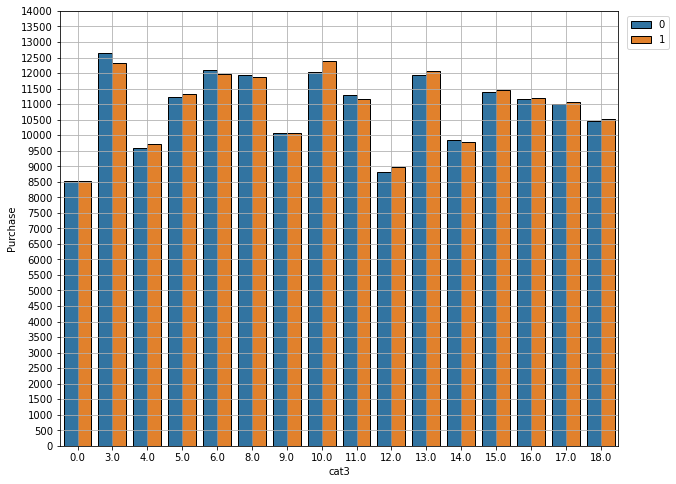

In [76]:
plt.figure(figsize = (10,8))
y = range(0,14001,500)
sns.barplot(x= "cat3", y = "Purchase",hue = "Marital_Status", data =data,ci = False, edgecolor= "black")
plt.yticks(y)
plt.grid()
plt.legend(bbox_to_anchor=(1.10,1),loc = "upper right")
plt.show()

In Product Category 3 contributes almost same in purchasing rates it won't affect alot that Marital Status also

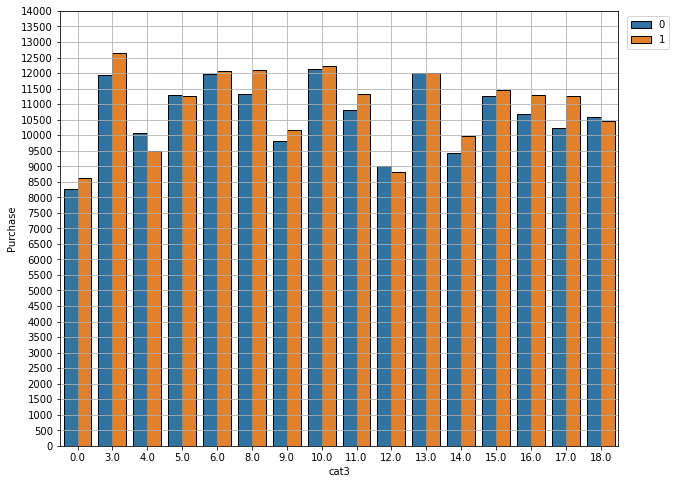

In [77]:
plt.figure(figsize = (10,8))
y = range(0,14001,500)
sns.barplot(x= "cat3", y = "Purchase",hue = "Gender", data =data,ci = False, edgecolor= "black")
plt.yticks(y)
plt.grid()
plt.legend(bbox_to_anchor=(1.10,1),loc = "upper right")
plt.show()

we can conclude that the percenatge of purchasing goods in Product category 3 there are not that much difference but somewhere men over women is higher.

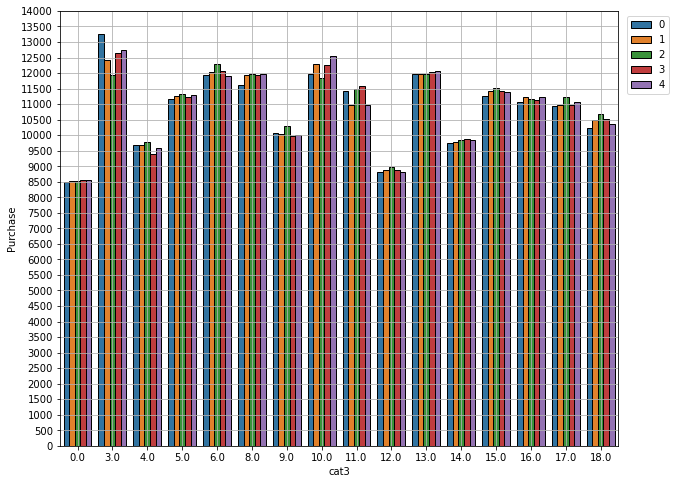

In [78]:
plt.figure(figsize = (10,8))
y = range(0,14001,500)
sns.barplot(x= "cat3", y = "Purchase",hue = "Stay_city_years", data =data,ci = False, edgecolor= "black")
plt.yticks(y)
plt.grid()
plt.legend(bbox_to_anchor=(1.10,1),loc = "upper right")
plt.show()

No handles with labels found to put in legend.


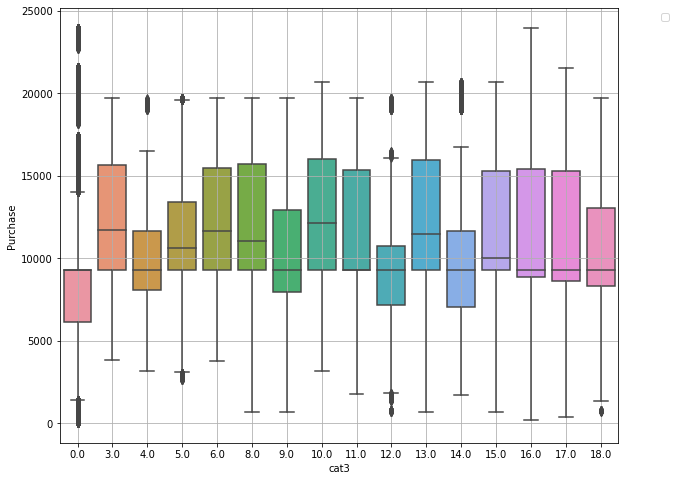

In [79]:
plt.figure(figsize = (10,8))
sns.boxplot(x= "cat3", y = "Purchase", data =data)
plt.grid()
plt.legend(bbox_to_anchor=(1.10,1),loc = "upper right")
plt.show()

there are not that much difference in purcahsing, outlayers are less then product category 2 , purcahing is almost common between quartile 2 to quartile 3

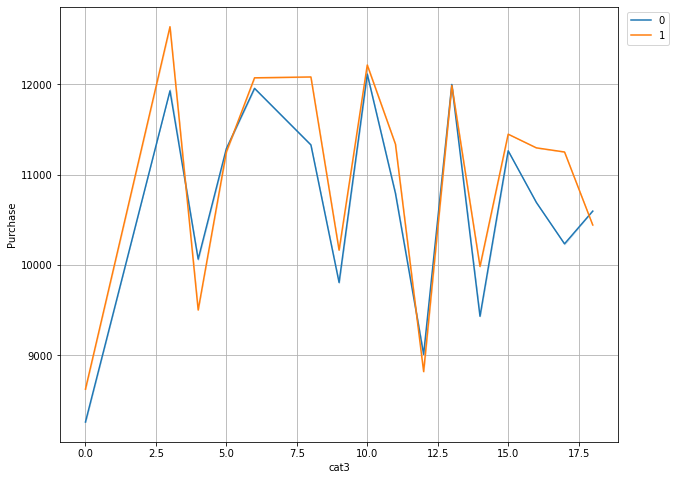

In [80]:
plt.figure(figsize = (10,8))
sns.lineplot(x= "cat3", y = "Purchase",hue="Gender" ,data =data, ci  = False)
plt.grid()
plt.legend(bbox_to_anchor=(1.10,1),loc = "upper right")
plt.show()

<Figure size 720x576 with 0 Axes>

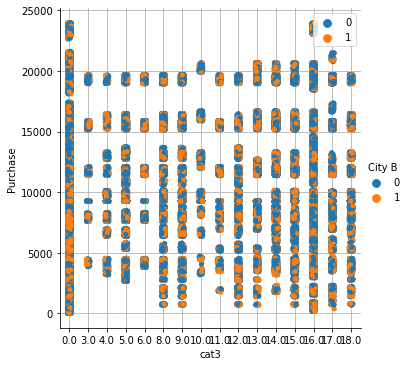

In [81]:
plt.figure(figsize = (10,8))
#y = range(0,25001,1000)
sns.catplot(x= "cat3", y = "Purchase",hue ='City B', data =data,ci = False)
#plt.yticks(y)
plt.grid()
plt.legend(bbox_to_anchor=(1,1),loc = "upper right")
plt.show()

<Figure size 720x576 with 0 Axes>

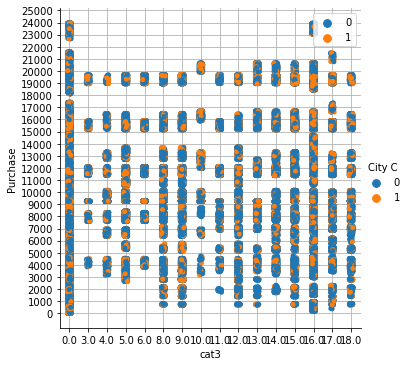

In [83]:
plt.figure(figsize = (10,8))
y = range(0,25001,1000)
sns.catplot(x= "cat3", y = "Purchase",hue ='City C', data =data,ci = False)
plt.yticks(y)
plt.grid()
plt.legend(bbox_to_anchor=(1,1),loc = "upper right")
plt.show()

One thing we can clearly conclude is that there is no such variation in the percentage of the purchasing whether the person is married or not. Staying time also does not matter in some category men over women for purchasing but not to much difference product category3 is much more purchased by people than product category2 and product category1.